In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1 - Loading Data

In [2]:
X_path = (
    "https://raw.githubusercontent.com/coding-blocks-archives/machine-learning-online-2018/refs/heads/master"
    "/3.%20Linear%20Regression/Linear%20Regression/Training%20Data/Linear_X_Train.csv"
)

y_path = (
    "https://raw.githubusercontent.com/coding-blocks-archives/machine-learning-online-2018/refs/heads/master/"
    "3.%20Linear%20Regression/Linear%20Regression/Training%20Data/Linear_Y_Train.csv"
)

-0.03779466168006854 0.9920801322508517


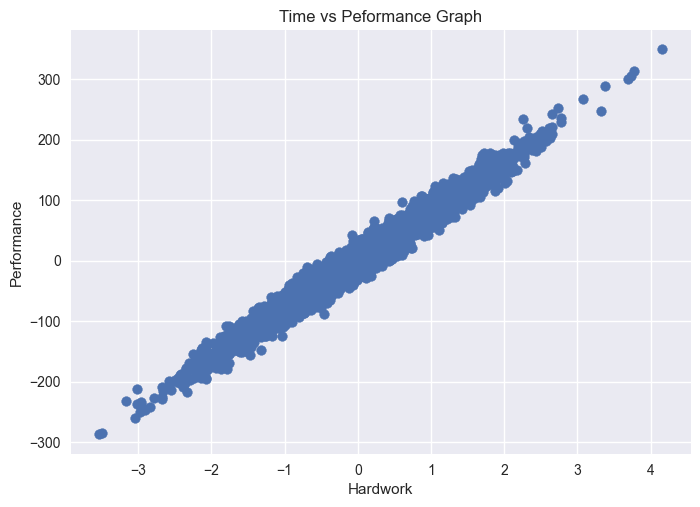

In [3]:
# Loading the data
X = pd.read_csv(X_path)
y = pd.read_csv(y_path)

# Converting X, y to array numpy
X = X.values
y = y.values

# Normalization
u = X.mean()
std = X.std()
X = (X-u)/std

print(u, std)

# Visualizing the data
plt.style.use('seaborn-v0_8')
plt.title("Time vs Peformance Graph")
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.scatter(X, y)
plt.show()

In [4]:
X.shape, y.shape

((3750, 1), (3750, 1))

# Linear Regression

In [5]:
def hypothesis(x, theta):
    # theta = [theta0, theta1]
    y_ = theta[0] + theta[1]*x

    return y_

def gradient(X, Y, theta):
    m = X.shape[0]

    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x, theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x

    return grad/m

def error(X, Y, theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i], theta)
        total_error += (y_ - Y[i])**2
    
    return total_error/m

def gradientDescent(X,Y,max_steps=100,learning_rate=0.1):

    theta = np.zeros((2,))
    error_list = []
    for i in range(max_steps):
        grad = gradient(X,Y,theta)
        error_list.append(error(X,Y,theta))
        #Update theta
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
    return theta, error_list
    

In [6]:
theta, error_list = gradientDescent(X,y)

C:\Users\Jayron\AppData\Local\Temp\ipykernel_22368\3304265025.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[0] += (y_ - y)
C:\Users\Jayron\AppData\Local\Temp\ipykernel_22368\3304265025.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[1] += (y_ - y)*x


In [7]:
theta

array([ 0.6838508 , 79.90361453])

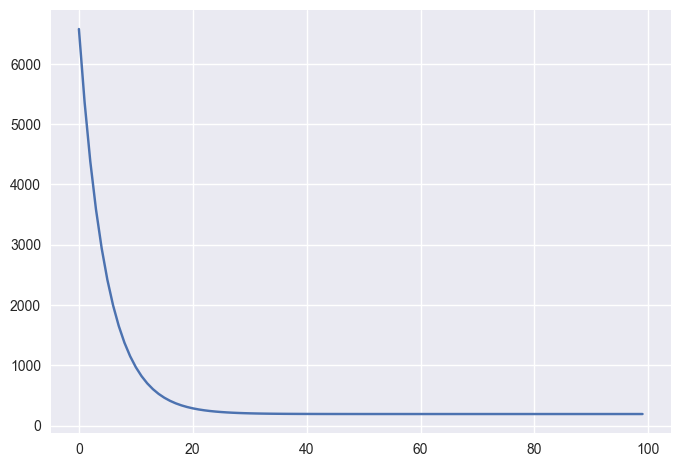

In [8]:
plt.plot(error_list)

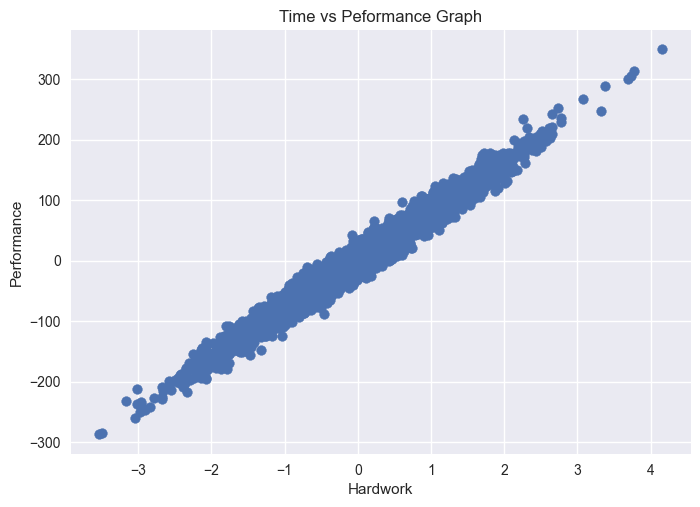

In [9]:
plt.style.use('seaborn-v0_8')
plt.title("Time vs Peformance Graph")
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.scatter(X, y)
plt.show()

In [10]:
print("Find theta:", theta)

Find theta: [ 0.6838508  79.90361453]


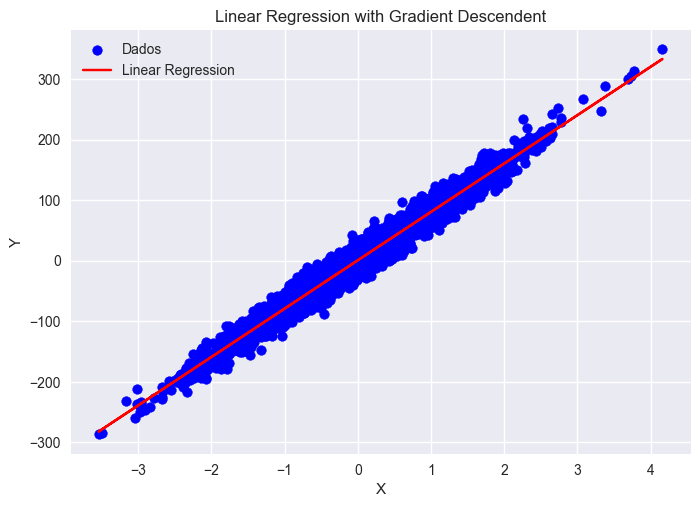

In [12]:
plt.scatter(X, y, color='blue', label='Dados')
plt.plot(X, hypothesis(X, theta), color='red', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression with Gradient Descendent')
plt.legend()
plt.show()